In [10]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('cemara_dataset.csv')
data = data.drop(['Timestamp'], axis=1)
data = data.dropna(axis=0)
x = data.drop(['Aktivitas'], axis=1)
y = data['Aktivitas']

le = LabelEncoder()
x = pd.get_dummies(x)
y = le.fit_transform(y)
x.shape, y.shape

((222, 45), (222,))

### Mendefenisikan arsitektur fully connected layer
pendefenisian arsitektur fully connected neural network menggunakan API fungsi sequential() 

In [11]:
def build_fc_model():
  fc_model = tf.keras.Sequential([

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(13, activation=tf.nn.relu, input_shape=(13,)),
      tf.keras.layers.Dense(100, activation=tf.nn.relu),
      tf.keras.layers.Dense(100, activation=tf.nn.relu),
      tf.keras.layers.Dense(1) 
      
  ])
  return fc_model

model = build_fc_model()

###Melakukan compile dengan menggunakan Optimizer Adam dan learning rate=0.001, loss"MSE" dan metrics "MAE"

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
            loss='mse',
            metrics=['mae'])

###Training Data

In [13]:
BATCH_SIZE = 32
EPOCHS = 200
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
hasilAdam = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2,
                    verbose=0)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 45)                0         
                                                                 
 dense_8 (Dense)             (None, 13)                598       
                                                                 
 dense_9 (Dense)             (None, 100)               1400      
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 12,199
Trainable params: 12,199
Non-trainable params: 0
_________________________________________________________________


##Menampilkan hasil

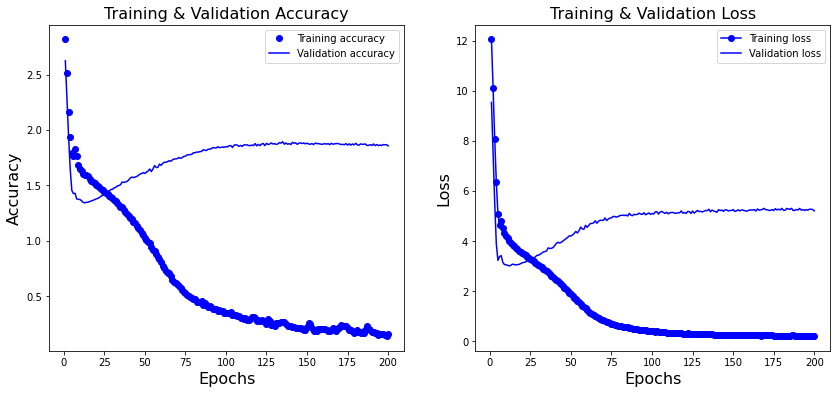

In [15]:
import matplotlib.pyplot as plt
 
history_dict = hasilAdam.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo-', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [16]:
import pathlib
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_file = pathlib.Path('haepe.tflite')
tflite_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ZAKKIC~1\AppData\Local\Temp\tmpu76gbtoc\assets


INFO:tensorflow:Assets written to: C:\Users\ZAKKIC~1\AppData\Local\Temp\tmpu76gbtoc\assets


51548